In [1]:
# Batch Save Scans 
# 16 bit image tiff files 

import numpy as np
import matplotlib.pyplot as plt
from lumicks import pylake
import glob

# select the folder, here we search for .h5 files in the folder where you're running the script in
# directory_save = '/mnt/d/OneDrive - Johns Hopkins University/Ha_CCarcamo/Data/SWR1/cas9/2019-11-06 cas9 3crRNAs ATTO550/'
directory_save = '/mnt/d/OneDrive - Johns Hopkins University/Ha_CCarcamo/Data/C_Trap/20200110 issues with fluorescence/'
# directory_h5 = directory_save + 'scans h5/'
directory_h5 = directory_save

files = glob.glob(directory_h5 + '*Scan*.h5')
print("found {} files in folder".format(len(files)))
for file_name in files:
    print(file_name)
    file = pylake.File(file_name)
    key = list(file.scans.keys())[0]
    scan = file.scans[key]
#     #scan.save_tiff(file_name[:-3] + "scan" + key + ".tiff", dtype=np.float16)
#     scan.save_tiff(file_name[:-3] + ".tiff", dtype=np.float16)
#     scan.save_tiff(f"{directory_h5}scan_{key}_nochangetobits.tiff",  dtype=np.float16)
    scan.save_tiff(f"{directory_h5}scan_{key}_nochangetobits.tiff")

found 20 files in folder
/mnt/d/OneDrive - Johns Hopkins University/Ha_CCarcamo/Data/C_Trap/20200110 issues with fluorescence/20200110-160928 Scan 19.h5
/mnt/d/OneDrive - Johns Hopkins University/Ha_CCarcamo/Data/C_Trap/20200110 issues with fluorescence/20200110-161001 Scan 19.h5
/mnt/d/OneDrive - Johns Hopkins University/Ha_CCarcamo/Data/C_Trap/20200110 issues with fluorescence/20200110-161009 Scan 18.h5
/mnt/d/OneDrive - Johns Hopkins University/Ha_CCarcamo/Data/C_Trap/20200110 issues with fluorescence/20200110-161012 Scan 17.h5
/mnt/d/OneDrive - Johns Hopkins University/Ha_CCarcamo/Data/C_Trap/20200110 issues with fluorescence/20200110-161015 Scan 16.h5
/mnt/d/OneDrive - Johns Hopkins University/Ha_CCarcamo/Data/C_Trap/20200110 issues with fluorescence/20200110-161018 Scan 15.h5
/mnt/d/OneDrive - Johns Hopkins University/Ha_CCarcamo/Data/C_Trap/20200110 issues with fluorescence/20200110-161021 Scan 14.h5
/mnt/d/OneDrive - Johns Hopkins University/Ha_CCarcamo/Data/C_Trap/20200110 iss

In [1]:
pwd

'C:\\Users\\carca\\OneDrive - Johns Hopkins University\\Ha_CCarcamo\\jupyter notebooks'

In [2]:
# Batch Save Kymographs 
# 16 bit image tiff files  
import numpy as np
import matplotlib.pyplot as plt
from lumicks import pylake
import glob
# select the folder, here we search for .h5 files in the folder where you're running the script in
# D:\OneDrive - Johns Hopkins University\Ha_CCarcamo\Data\C_Trap\2019-10-15 cas9\SECOND 
directory_save = '/mnt/d/OneDrive - Johns Hopkins University/Ha_CCarcamo/Data/C_Trap/20200110 issues with fluorescence/'
files = glob.glob(directory + '*Kymograph*.h5')
print("found {} files in folder".format(len(files)))
for file_name in files:
    print(file_name)
    file = pylake.File(file_name)
    key = list(file.kymos.keys())[0]
    scan = file.kymos[key]
#     #scan.save_tiff(file_name[:-3] + "scan" + key + ".tiff", dtype=np.float16)
#     scan.save_tiff(file_name[:-3] + ".tiff", dtype=np.float16)
#     scan.save_tiff(f"{directory}kymo_{key}.tiff", dtype=np.float16)
    scan.save_tiff(f"{directory}kymo_{key}.tiff")

#     scan.save_tiff(f"/mnt/d/ctrap/data/2019-06-04 SWR1/kymos/kymo_{key}clipfalse.tiff", dtype=np.int32, clip=True)

NameError: name 'directory' is not defined

In [3]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from lumicks import pylake
import glob

sys.stdout = open('/mnt/d/OneDrive - Johns Hopkins University/Ha_CCarcamo/Data/C_Trap/2019-09-12 CAS9/output.txt','wt')

files = glob.glob('/mnt/d/OneDrive - Johns Hopkins University/Ha_CCarcamo/Data/C_Trap/2019-09-12 CAS9/*Kymograph*.h5')
#print("found {} files in folder".format(len(files)))
for file_name in files:
    file = pylake.File(file_name)
    key = list(file.kymos.keys())[0]
    scan = file.kymos[key]
    time = scan.timestamps
    t1 = time[0]
    c1 = (t1 - t1[0]) * 1e-9 + 1
    start = c1[0]
    second =c1[1]
    end = c1[-1]
    ky_file = scan.file
    distance = ky_file['Distance']['Distance 1'].data
    #print(f"{key}", f"Average Distance = {np.around(np.average(distance), decimals = 2)}um", f"        Time per line scan (ms)= {np.around((second-start)*1000, decimals = 2)}", f"        Length of Kymo (s) = {np.around(end-start, decimals = 2)}")
    print(f"{key},", f"{np.around(np.average(distance), decimals = 2)},", f"{np.around((second-start)*1000, decimals = 2)},", f"{np.around(end-start, decimals = 2)},")


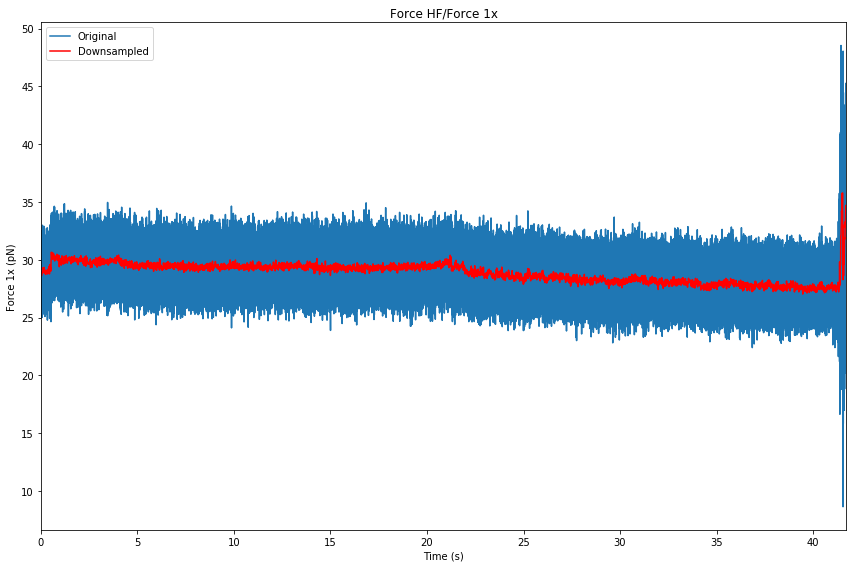

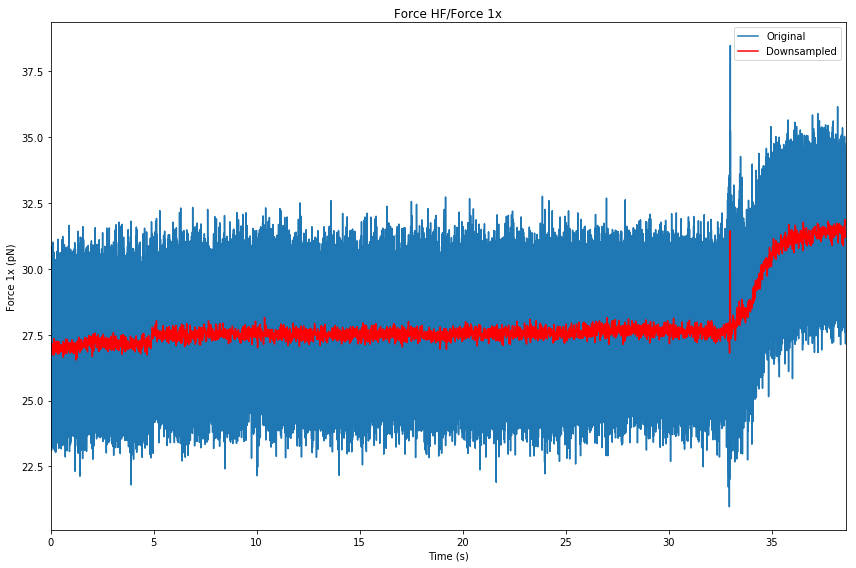

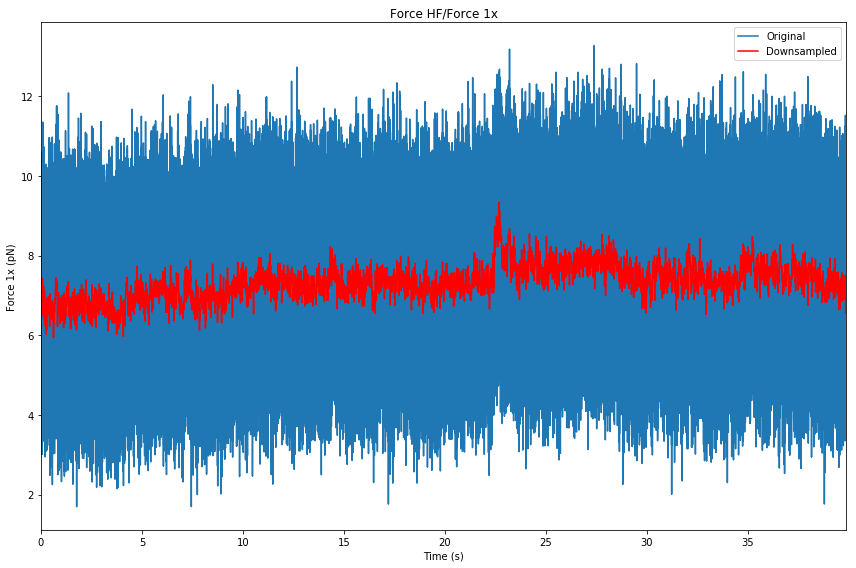

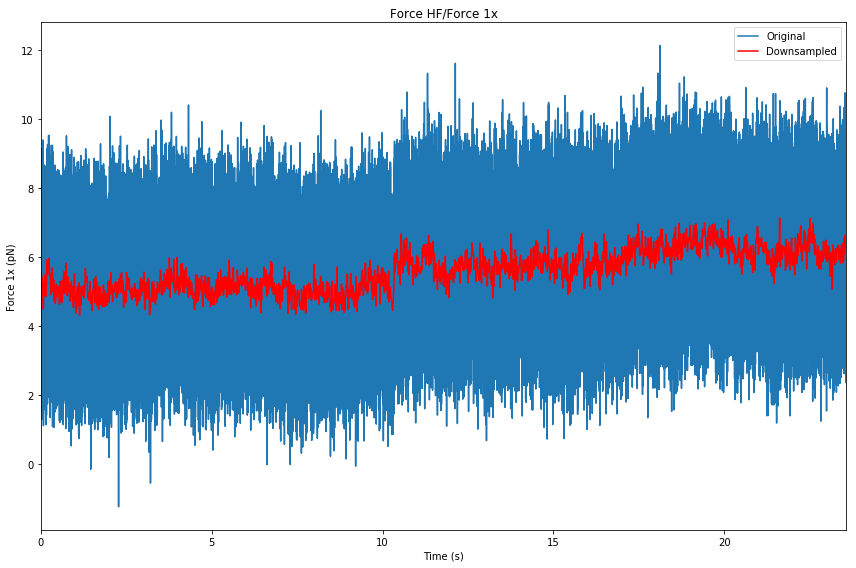

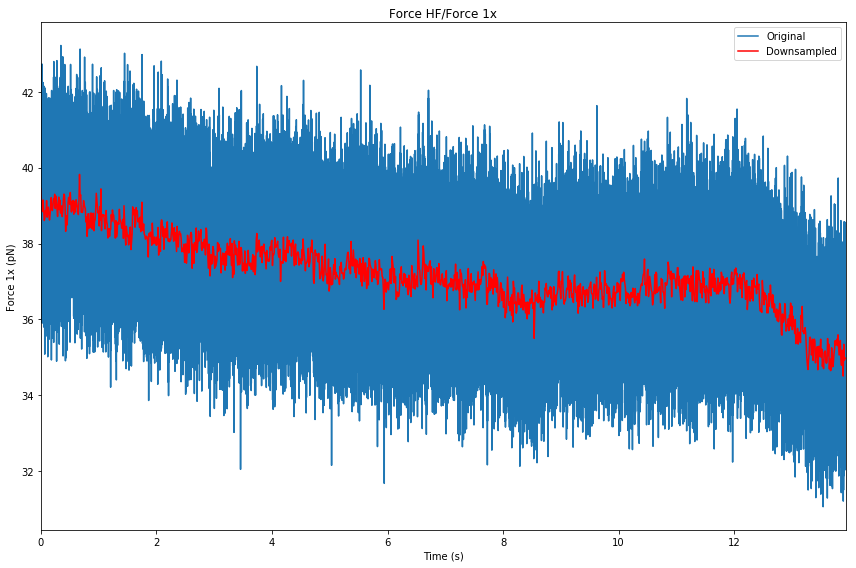

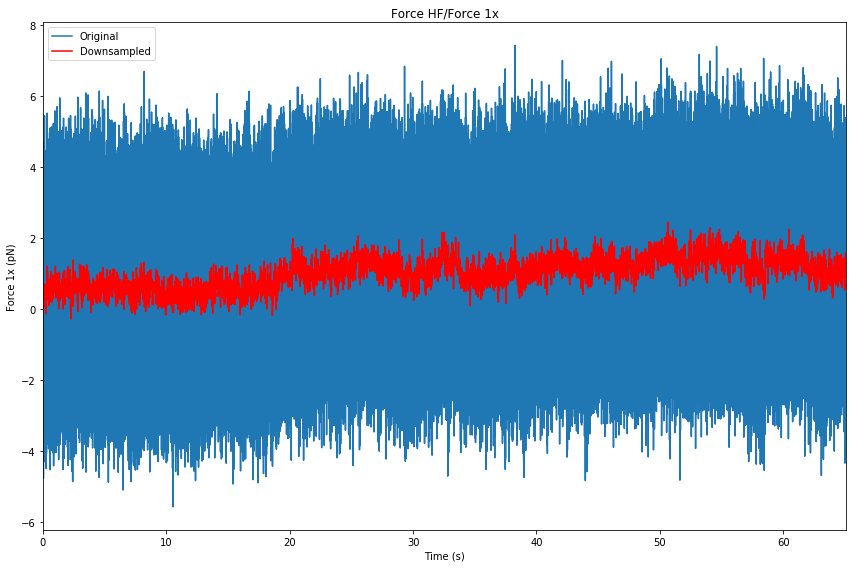

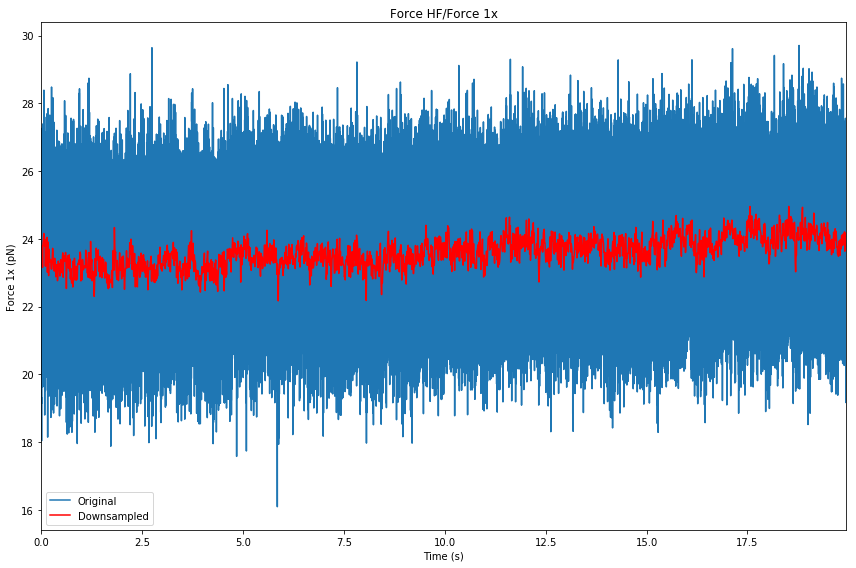

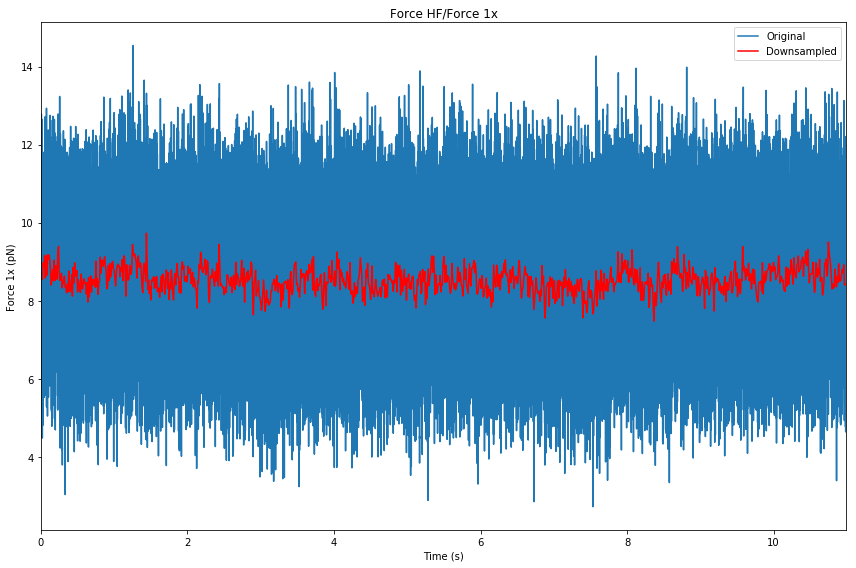

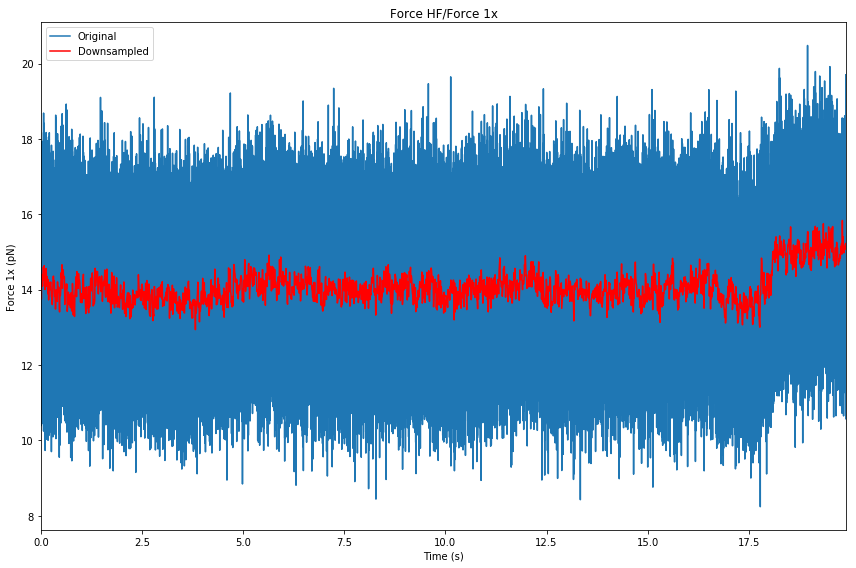

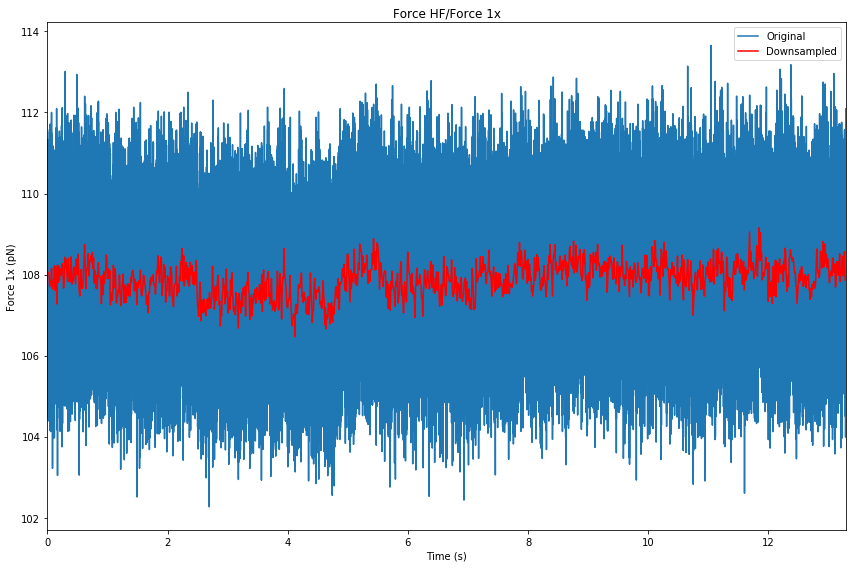

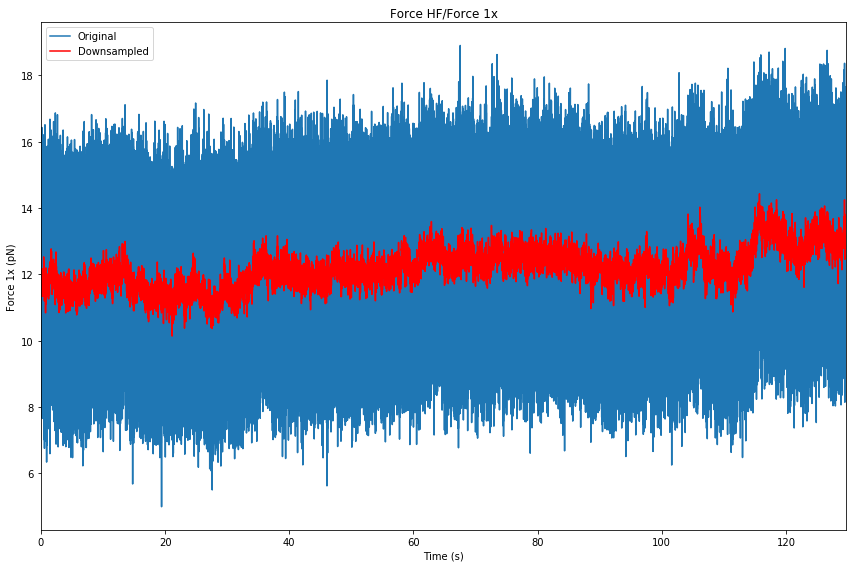

In [5]:
# Batch Save FD curves 


import numpy as np
import matplotlib.pyplot as plt
from lumicks import pylake
import glob

# select the folder, here we search for .h5 files in the folder where you're running the script in

files = glob.glob('/mnt/d/OneDrive - Johns Hopkins University/Ha_CCarcamo/Data/C_Trap/2019-09-12 CAS9/*Kymograph*.h5')
print("found {} files in folder".format(len(files)))
for file_name in files:
    print(file_name)
    
    file = pylake.File(file_name)
    kymos = list(file.kymos)
    kymo_data = file.kymos[kymos[0]]
    kymo = file.kymos[kymos[0]]
    key = list(file.kymos.keys())[0]
    fig = plt.figure(figsize=(12,8))
    forcex = file['Force HF']['Force 1x']
    time = forcex.timestamps/1e9
    time = time - time[0]
    sample_rate = forcex.sample_rate
    downsampled_rate = 100 # Hz
    forcex_downsamp = forcex.downsampled_by(int(sample_rate/downsampled_rate))
    time_downsamp = forcex_downsamp.timestamps/1e9
    time_downsamp = time_downsamp - time_downsamp[0]
    forcex.plot(label="Original")
    forcex_downsamp.plot(color='r',label="Downsampled")
    plt.ylabel('Force 1x (pN)')
    plt.xlim([0,max(time)])
    plt.legend()
    plt.tight_layout()
    plt.savefig(f"/mnt/d/OneDrive - Johns Hopkins University/Ha_CCarcamo/Data/C_Trap/2019-09-12 CAS9/FD_curve_{key}.png")

In [6]:
print(key + ".tiff")
print(scan)

NameError: name 'key' is not defined

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from lumicks import pylake
%cd /mnt/d/ctrap/data/2019-06-11
file =pylake.File("20190611-170531 SWR1 250pM Kymograph DNA 1.h5")

kymos = list(file.kymos)
kymo = file.kymos[kymos[0]]

ky_file = kymo.file
distance = ky_file['Distance']['Distance 1'].data
print(np.average(distance))

kymo.json


/mnt/d/ctrap/data/2019-06-11
14.298921458701562


{'cereal_class_version': 1,
 'fluorescence': True,
 'force': False,
 'scan count': 0,
 'scan volume': {'center point (um)': {'x': 45.625006152739175,
   'y': 47.09308360981779,
   'z': 0},
  'cereal_class_version': 1,
  'pixel time (ms)': 0.1,
  'scan axes': [{'axis': 0,
    'cereal_class_version': 1,
    'num of pixels': 244,
    'pixel size (nm)': 100,
    'scan time (ms)': 0,
    'scan width (um)': 24.37010401880466}]}}

In [2]:
# Determine the length in seconds of kymographs in batch. Determine scan rate for each line scan for each kymograph in batch

import numpy as np
import matplotlib.pyplot as plt
from lumicks import pylake
import glob

# files = glob.glob('/mnt/d/ctrap/data/2019-06-11/*Kymograph*.h5')
# print("found {} files in folder".format(len(files)))
# for file_name in files:
#     file = pylake.File(file_name)
#     key = list(file.kymos.keys())[0]
#     scan = file.kymos[key]
#     time = scan.timestamps
#     t1 = time[0]
#     c1 = (t1 - t1[0]) * 1e-9 + 1
#     start = c1[0]
#     second =c1[1]
#     print(second-start)
    
# files = glob.glob('/mnt/d/ctrap/data/2019-06-11/*Kymograph*.h5')
# print("found {} files in folder".format(len(files)))
# for file_name in files:
#     file = pylake.File(file_name)
#     key = list(file.kymos.keys())[0]
#     scan = file.kymos[key]
#     time = scan.timestamps
#     t1 = time[0]
#     c1 = (t1 - t1[0]) * 1e-9 + 1
#     start = c1[0]
#     end = c1[-1]
#     print(end-start)
    
  
files = glob.glob('/mnt/d/ctrap/data/2019-07-03 SWR1 3/h5 files/*Kymograph*.h5')
print("found {} files in folder".format(len(files)))
for file_name in files:
    file = pylake.File(file_name)
    key = list(file.kymos.keys())[0]
    scan = file.kymos[key]
    time = scan.timestamps
    t1 = time[0]
    c1 = (t1 - t1[0]) * 1e-9 + 1
    start = c1[0]
    second =c1[1]
    end = c1[-1]
    ky_file = scan.file
    distance = ky_file['Distance']['Distance 1'].data
    print(f"{key}", f"Average Distance = {np.around(np.average(distance), decimals = 2)}um", f"        Time per line scan (ms)= {np.around((second-start)*1000, decimals = 2)}", f"        Length of Kymo (s) = {np.around(end-start, decimals = 2)}" )
    

 

In [81]:
# Pull out the raw data for images
import numpy as np
import matplotlib.pyplot as plt
from lumicks import pylake
import glob
import sys

file = pylake.File('/mnt/d/ctrap/data/2019-06-04 SWR1/kymos/20190604-185741 1nM SWR1 in imaging buffer than contains SWR1 buffer that has BME Kymograph DNA 5(2) Motion of SWR1 see FD.h5')
kymos = list(file.kymos)
print(kymos)
kymo_data = file.kymos[kymos[0]]

image = kymo_data.green_image


green = kymo_data.file
print(green)

for fxn in dir(green):
    print(fxn)
    
counts = green['Photon count']['Green'].timestamps
print(counts)
#counts.shape

time_per_pixel = kymo_data.timestamps
print(time_per_pixel)
time_per_pixel.shape

image_array = kymo_data.green_image
print(image_array)
image_array.shape

#pixels_line = kymo_data.pixels_per_line
#print(pixels_line)


# np.save('/mnt/d/ctrap/data/2019-06-04 SWR1/kymos/image.txt', image_array, allow_pickle=True, fix_imports=True)
np.savetxt('/mnt/d/ctrap/data/2019-06-04 SWR1/kymos/image.txt', image_array)


['DNA 5(2) Motion of SWR1 see FD']
File root metadata:
- Bluelake version: 1.5.5
- Description: 
- Experiment: 1nM SWR1 in imaging buffer than contains SWR1 buffer that has BME
- Export time (ns): 1559689061945507900
- File format version: 2
- GUID: {4C3B18A6-3041-41FB-A8EC-CDD48BDCD964}

Bead diameter:
  Template 1:
  - Data type: [('Timestamp', '<i8'), ('Value', '<f8')]
  - Size: 948
  Template 2:
  - Data type: [('Timestamp', '<i8'), ('Value', '<f8')]
  - Size: 948
Bead position:
  Bead 1 X:
  - Data type: [('Timestamp', '<i8'), ('Value', '<f8')]
  - Size: 948
  Bead 1 Y:
  - Data type: [('Timestamp', '<i8'), ('Value', '<f8')]
  - Size: 948
  Bead 2 X:
  - Data type: [('Timestamp', '<i8'), ('Value', '<f8')]
  - Size: 948
  Bead 2 Y:
  - Data type: [('Timestamp', '<i8'), ('Value', '<f8')]
  - Size: 948
Calibration:
  93:
    Force 1x
    Force 1y
    Force 2x
    Force 2y
    JSON:
    - Data type: object
    - Size: 1
Confocal diagnostics:
  Blue shutter:
  - Data type: uint8
  - Si